## Analyzing Movie Studio Data

### Importing
We imported the Pandas, Numpy, Seaborn, and Matplotlib libraries so we could use them to manipulate the dataset and create visualizations for it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

Next, we used Pandas to read the dataset, which contains information about which studios made which movies, what year each movie was made, and how much money each movie made. 

In [3]:
df = pd.read_csv("./data/zippedData/bom.movie_gross.csv.gz")
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Sorting
Using the sort values function, we reorganized the dataset from the movie with the highest domestic gross to the movie with the lowest domestic gross.

In [4]:
df = df.sort_values("domestic_gross", ascending = False)
df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


### Null Values
Next, we figured out what percentage of information about movies was missing.

In [5]:
pct_missing = np.mean(df["foreign_gross"].isnull())
print('{} - {}%'.format("foreign_gross", round(pct_missing*100)))

pct_missing = np.mean(df["domestic_gross"].isnull())
print('{} - {}%'.format("domestic_gross", round(pct_missing*100)))

pct_missing = np.mean(df["studio"].isnull())
print('{} - {}%'.format("studio", round(pct_missing*100)))

pct_missing = np.mean(df["year"].isnull())
print('{} - {}%'.format("year", round(pct_missing*100)))

pct_missing = np.mean(df["title"].isnull())
print('{} - {}%'.format("title", round(pct_missing*100)))

foreign_gross - 40.0%
domestic_gross - 1.0%
studio - 0.0%
year - 0.0%
title - 0.0%


40% of values were missing in the foreign gross column and 1% of values were missing in the domestic gross column. We dropped all of these null values to ensure the accuracy of our analyses. Due to the significant amount of data dropped from the foreign gross column, we chose to tighten our focus to domestic gross and use that as the primary indicator of movie success.

In [6]:
df = df.dropna(subset=['foreign_gross'])

In [7]:
df = df.dropna(subset=['domestic_gross'])

Then, we checked that all null values were gone.

In [10]:
pct_missing = np.mean(df["foreign_gross"].isnull())
print('{} - {}%'.format("foreign_gross", round(pct_missing*100)))
pct_missing = np.mean(df["domestic_gross"].isnull())
print('{} - {}%'.format("domestic_gross", round(pct_missing*100)))

foreign_gross - 0.0%
domestic_gross - 0.0%


### Making a New Dataframe
Then, we made another dataframe from the first 20 rows of the previous dataframe. Because we sorted the last dataframe by highest domestic gross, this new dataframe represents the top 20 highest grossing movies.

In [21]:
top20 = df.head(20)
top20

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


We then determined which studio made the most movies in our top 20.

In [22]:
top20['studio'].value_counts(normalize=True) * 100

BV      65.0
WB      10.0
LGF     10.0
Uni.    10.0
Sony     5.0
Name: studio, dtype: float64

We learned BV is the studio responsible for 65% of the top 20 highest grossing movies.

### Making a Visualization
Once we discovered  Buena Vista (abbreviated "BV") is the movie studio that makes the majority of highest grossing movies, we made a bar chart to communicate this valuable information.

First, we created a color palette so each studio would be represented by a certain color.

In [259]:
custom_palette = []
labels = [ ]
for x in top20["studio"]:
    labels.append(x)
    if x == "BV":
        custom_palette.append('b')
    elif x=="Uni.":
        custom_palette.append('r')
    elif x=="WB":
        custom_palette.append('green')
    elif x=="LGF":
        custom_palette.append('yellow')
    else:
        custom_palette.append('purple')
    

In [260]:
labels = set(labels)

Following this is the code to create our graph:

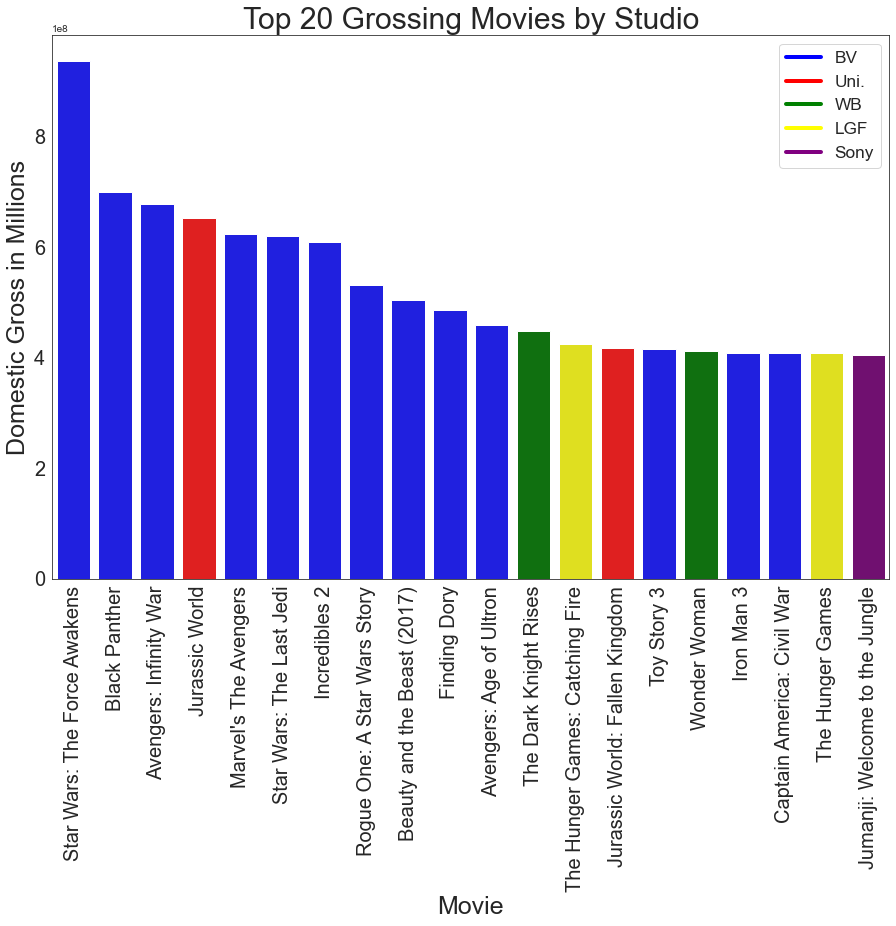

In [281]:
x = top20["title"]
y = top20["domestic_gross"]

plt.figure(figsize=(15, 10))
sns.set_style('white')
sns.set_palette("bright")
bar = sns.barplot(x = x,
            y = y,
            palette=custom_palette)
plt.legend(custom_lines, ['BV', 'Uni.', 'WB', "LGF", "Sony"], fontsize="xx-large") ###
custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4),
                Line2D([0], [0], color="yellow", lw=4),
                Line2D([0], [0], color="purple", lw=4)]
plt.ylabel("Domestic Gross in Millions", size=25)
plt.xlabel("Movie", size=25)
bar.tick_params(axis='y', labelsize=20)
plt.xticks(rotation = 90, size = 20)
plt.title("Top 20 Grossing Movies by Studio", size=30)

plt.savefig("top20_barplot_Seaborn_barplot_Python.png")

plt.show();



Now we have a strong reccomendation we can make to Microsoft: 

Buena Vistas studios is their best bet if they want to make the highest domestic gross possible.